# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [28]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in /opt/anaconda3/lib/python3.7/site-packages (5.7.0)
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_fatalities = pd.read_csv('/Users/Rachana 1/Desktop/fatal-force-analysis/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_fatalities.head())
print(df_fatalities.shape)
print(df_fatalities.columns)
print(df_fatalities.isna().values.any())
print(df_fatalities.duplicated().sum())

   id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fl

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [6]:
# Count the NaN under an entire DataFrame
print(f'Total NaN values: {df_fatalities.isnull().sum().sum()}')

# Count the NaN in each column
print('NaN values per column:')
print(df_fatalities.isnull().sum())

Total NaN values: 4316
NaN values per column:
id                            0
name                        349
date                          0
manner_of_death               0
armed                       209
age                         405
gender                        6
race                       1287
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        640
body_camera                   0
longitude                   710
latitude                    710
is_geocoding_exact            0
dtype: int64


In [7]:
# Substitute zero for NaN values with .fillna() method
df_fatalities.fillna(0, inplace=True)

# Check for NaN values
print(df_fatalities.isna().values.any())

False


# Create Donut Chart by of People Killed by Race

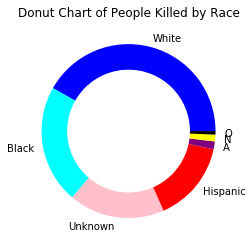

In [90]:
# Create a pieplot
colors=['Blue', 'Cyan', 'Pink', 'Red', 'Purple', 'Yellow', 'Black']
plt.pie(df_fatalities.race.value_counts(), labels=['White', 'Black', 'Unknown', 'Hispanic', 'A', 'N', 'O'],colors=colors)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Donut Chart of People Killed by Race')

plt.show()

In [30]:
print(df_fatalities.race.value_counts())

W    3021
B    1593
0    1287
H    1088
A     105
N      91
O      47
Name: race, dtype: int64

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [47]:
df_fatalities.gender.value_counts()

M    6900
F     326
0       6
Name: gender, dtype: int64

In [68]:
gender_comp = df_fatalities.groupby('gender').count()

# Delete the first row
gender_comp = gender_comp.tail(gender_comp.shape[0] -1)

print(gender_comp)

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
gender,,,,,,,,,,,,,,,,
F,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
M,6900,6900,6900,6900,6900,6900,6900,6900,6900,6900,6900,6900,6900,6900,6900,6900


<BarContainer object of 2 artists>

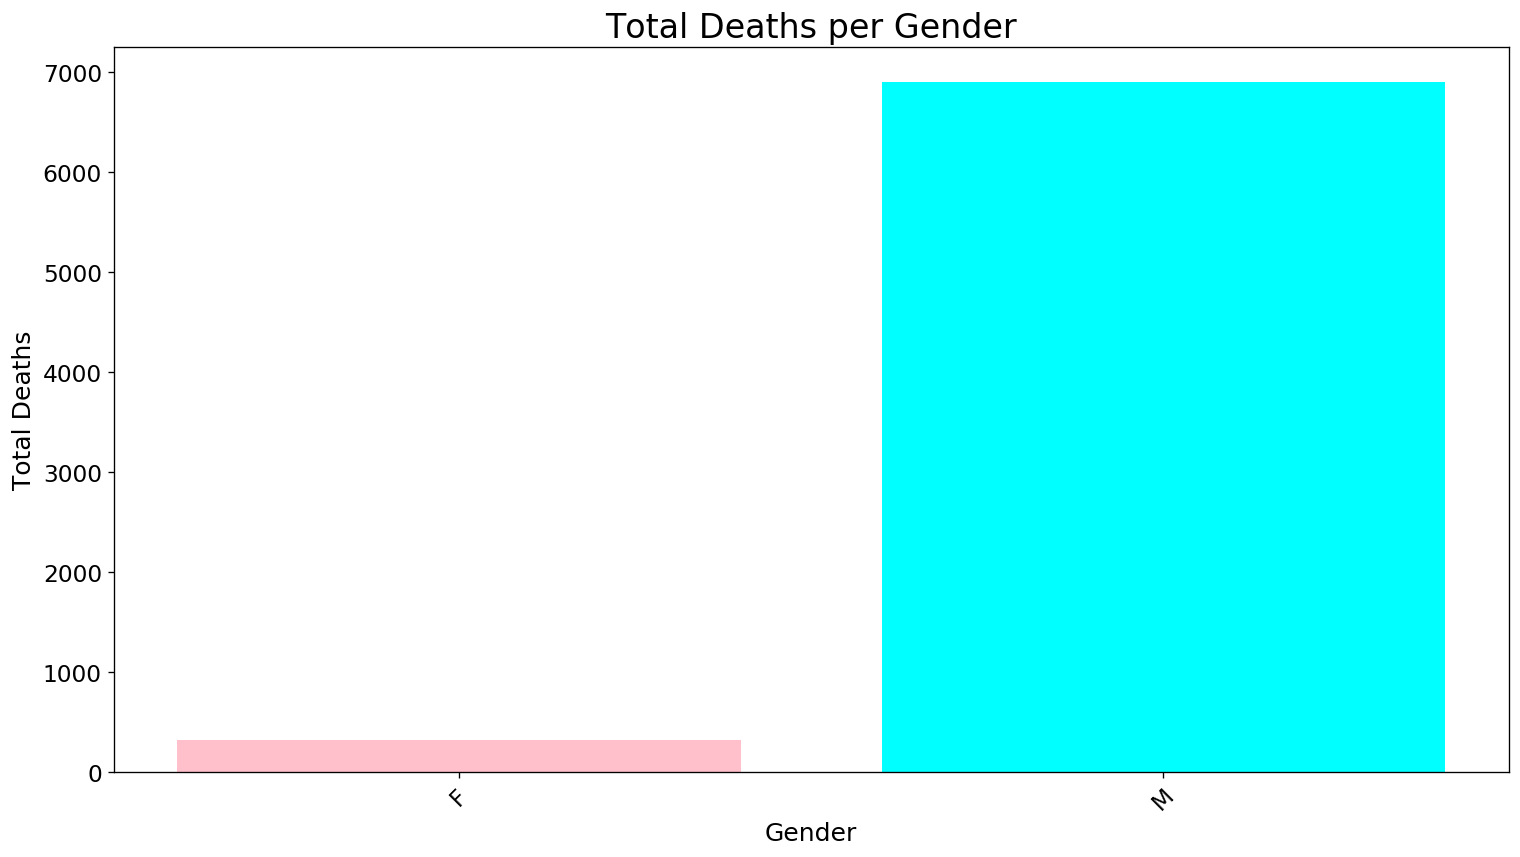

In [84]:
plt.figure(figsize=(15,8), dpi=120)
plt.xticks(fontsize=14, rotation=45) # Rotate category names to avoid overlap
plt.yticks(fontsize=14)
plt.ylabel('Total Deaths', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.title('Total Deaths per Gender', fontsize=20)

plt.bar(gender_comp.index, gender_comp.id, color=['pink', 'cyan'])

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [101]:
print(df_fatalities.armed.value_counts())

gun              4127
knife            1046
unarmed           441
vehicle           260
undetermined      253
                 ... 
microphone          1
bow and arrow       1
metal rake          1
motorcycle          1
nail gun            1
Name: armed, Length: 99, dtype: int64


In [95]:
armed_comp = df_fatalities.groupby('armed').count()

# Delete the first row
armed_comp = armed_comp.tail(armed_comp.shape[0] -1)

In [118]:
armed_comp = armed_comp.sort_values('id', ascending=False)
print(armed_comp[:10].id)

armed
gun               4127
knife             1046
unarmed            441
vehicle            260
undetermined       253
toy weapon         237
unknown weapon     103
machete             55
Taser               36
gun and knife       26
Name: id, dtype: int64


<BarContainer object of 10 artists>

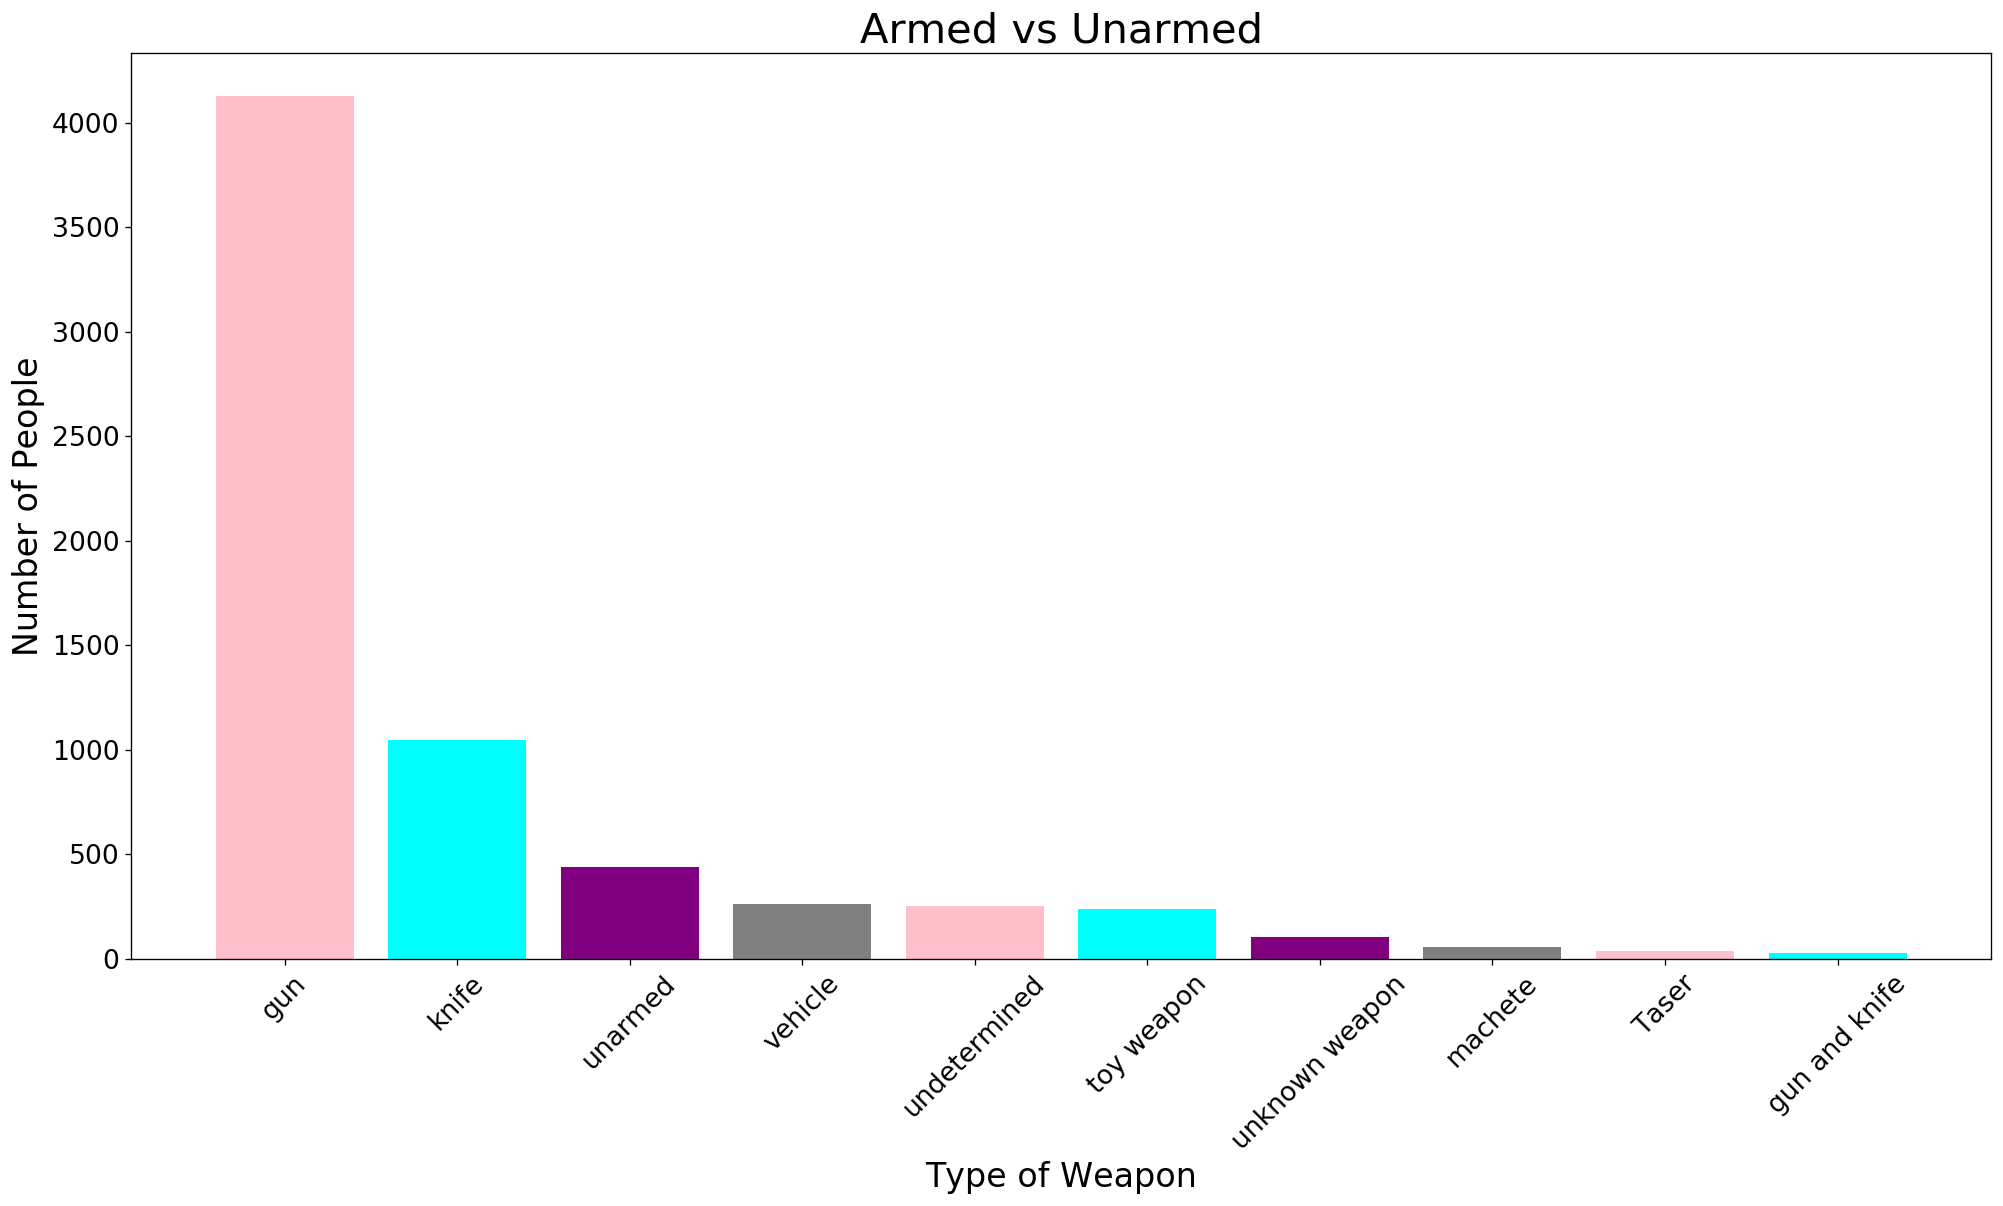

In [117]:
plt.figure(figsize=(20,10), dpi=120)
plt.xticks(fontsize=16, rotation=45) # Rotate category names to avoid overlap
plt.yticks(fontsize=16)
plt.ylabel('Number of People', fontsize=20)
plt.xlabel('Type of Weapon', fontsize=20)
plt.title('Armed vs Unarmed', fontsize=25)

plt.bar(armed_comp.index[:10], armed_comp.id[:10], color=['pink', 'cyan', 'purple', 'grey'])

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [164]:
# Check if the person's age is under 25
under_25 = df_fatalities.age < 25

# Find the percentage
print(under_25.value_counts(normalize=True) * 100)

under_25_percent = (under_25.value_counts(normalize=True) * 100)[1]

print(f'Percentage of people under 25 is \
      {under_25_percent}')

False   79.40
True    20.60
Name: age, dtype: float64
Percentage of people under 25 is       20.60287610619469


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Text(0, 0.5, 'Number of People')

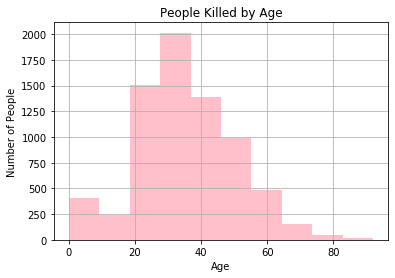

In [35]:
df_fatalities.hist(column='age', color='pink')

plt.title('People Killed by Age')
plt.xlabel('Age')
plt.ylabel('Number of People')

In [194]:
print(df_fatalities.age.value_counts().sort_values(ascending=False))

0.00     405
31.00    239
27.00    234
32.00    233
34.00    232
        ... 
88.00      2
89.00      1
8.00       1
92.00      1
78.00      1
Name: age, Length: 81, dtype: int64


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [213]:
grouped_by_race = df_fatalities.groupby('race').count()

# Delete the first row
grouped_by_race = grouped_by_race.tail(grouped_by_race.shape[0] -1)

In [223]:
grouped_by_race = grouped_by_race.sort_values('id', ascending=False)
print(grouped_by_race.id)

race
W    3021
B    1593
H    1088
A     105
N      91
O      47
Name: id, dtype: int64


<BarContainer object of 6 artists>

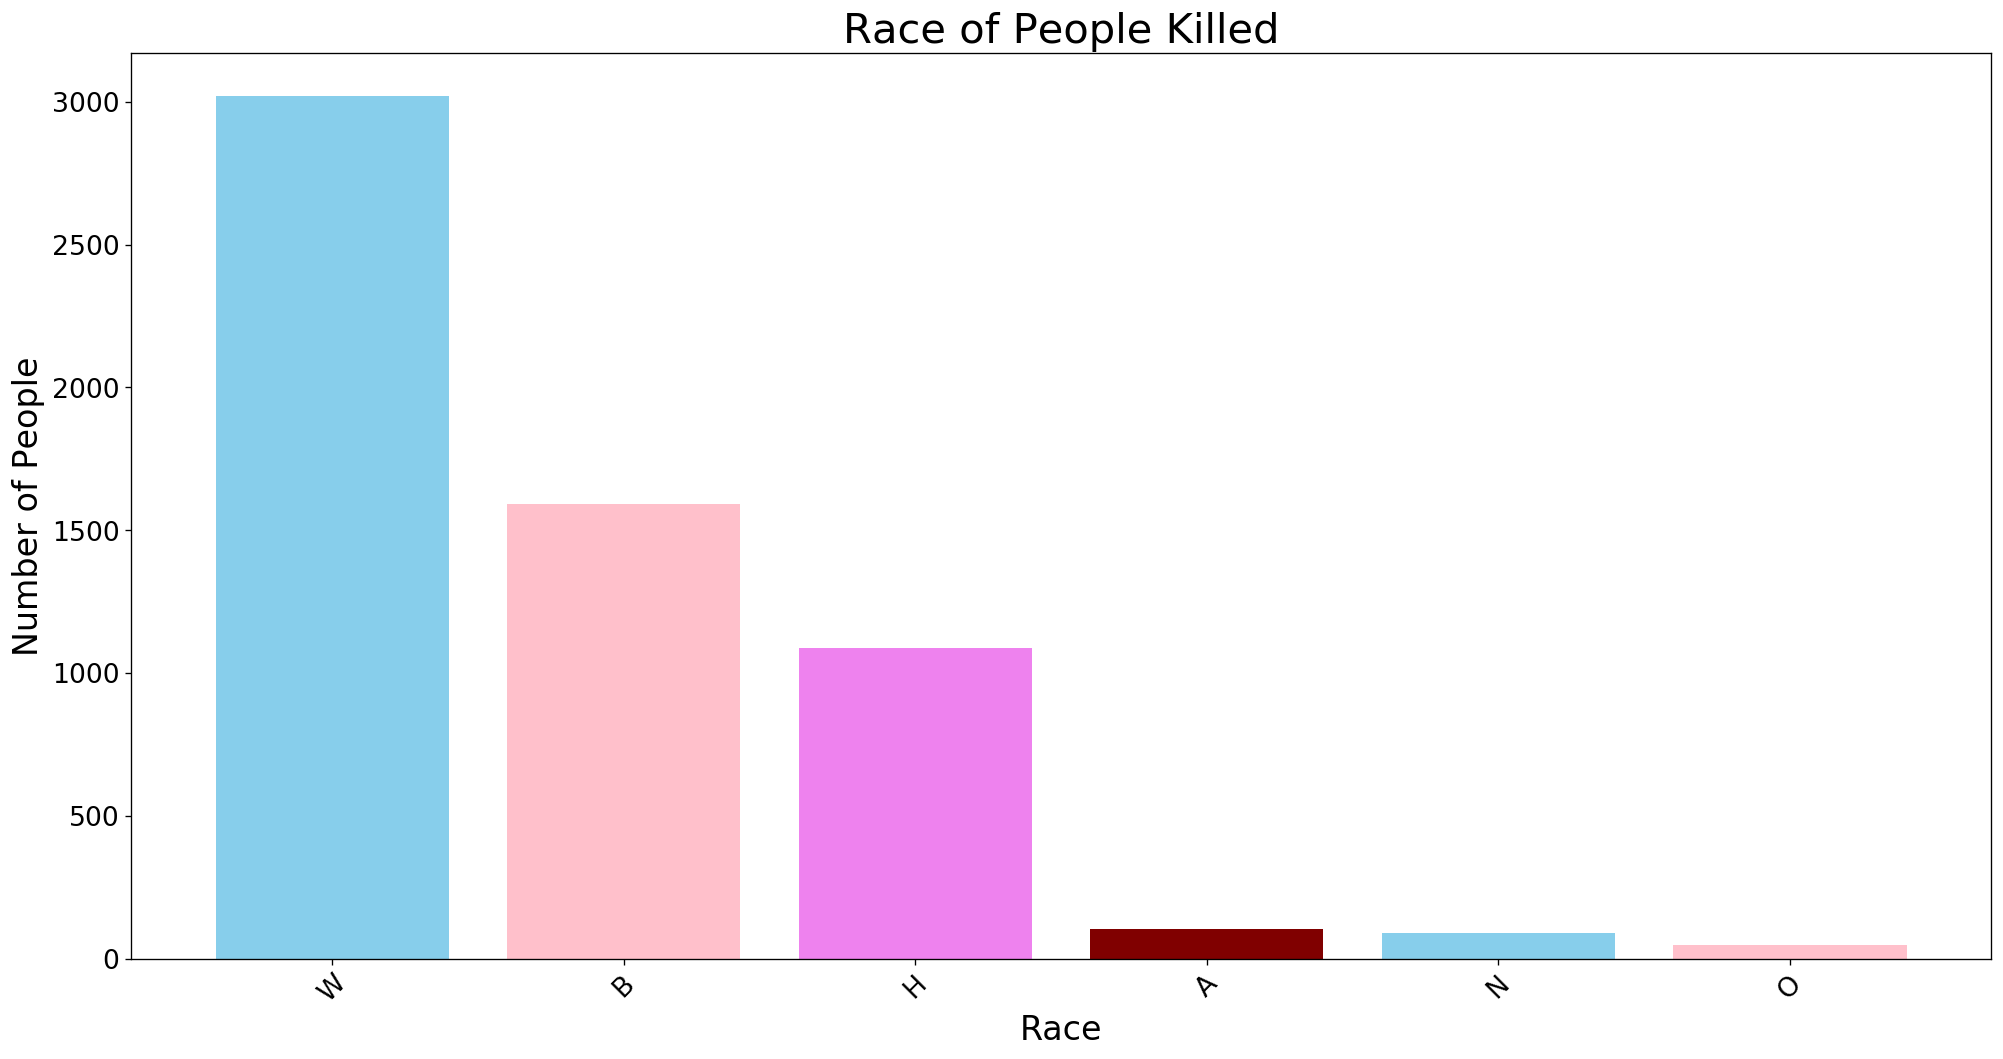

In [220]:
plt.figure(figsize=(20,10), dpi=120)
plt.xticks(fontsize=16, rotation=45) # Rotate category names to avoid overlap
plt.yticks(fontsize=16)
plt.ylabel('Number of People', fontsize=20)
plt.xlabel('Race', fontsize=20)
plt.title('Race of People Killed', fontsize=25)

plt.bar(grouped_by_race.index, grouped_by_race.id, color=['skyblue', 'pink', 'violet', 'maroon'])

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [247]:
# Check if the person showed signs of mental illness
mental_illness = df_fatalities.signs_of_mental_illness
mental_illness

# Find the percentage
# print(mental_illness.value_counts(normalize=True) * 100)

mentally_ill_percent = (mental_illness.value_counts(normalize=True) * 100)[1]

print(f'Percentage of people who were mentally ill and shot by police is \
      {mentally_ill_percent}')

Percentage of people who were mentally ill and shot by police is       21.76438053097345


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [257]:
top_10_cities = df_fatalities.groupby('city').count().sort_values('id', ascending=False)[:10]

<BarContainer object of 10 artists>

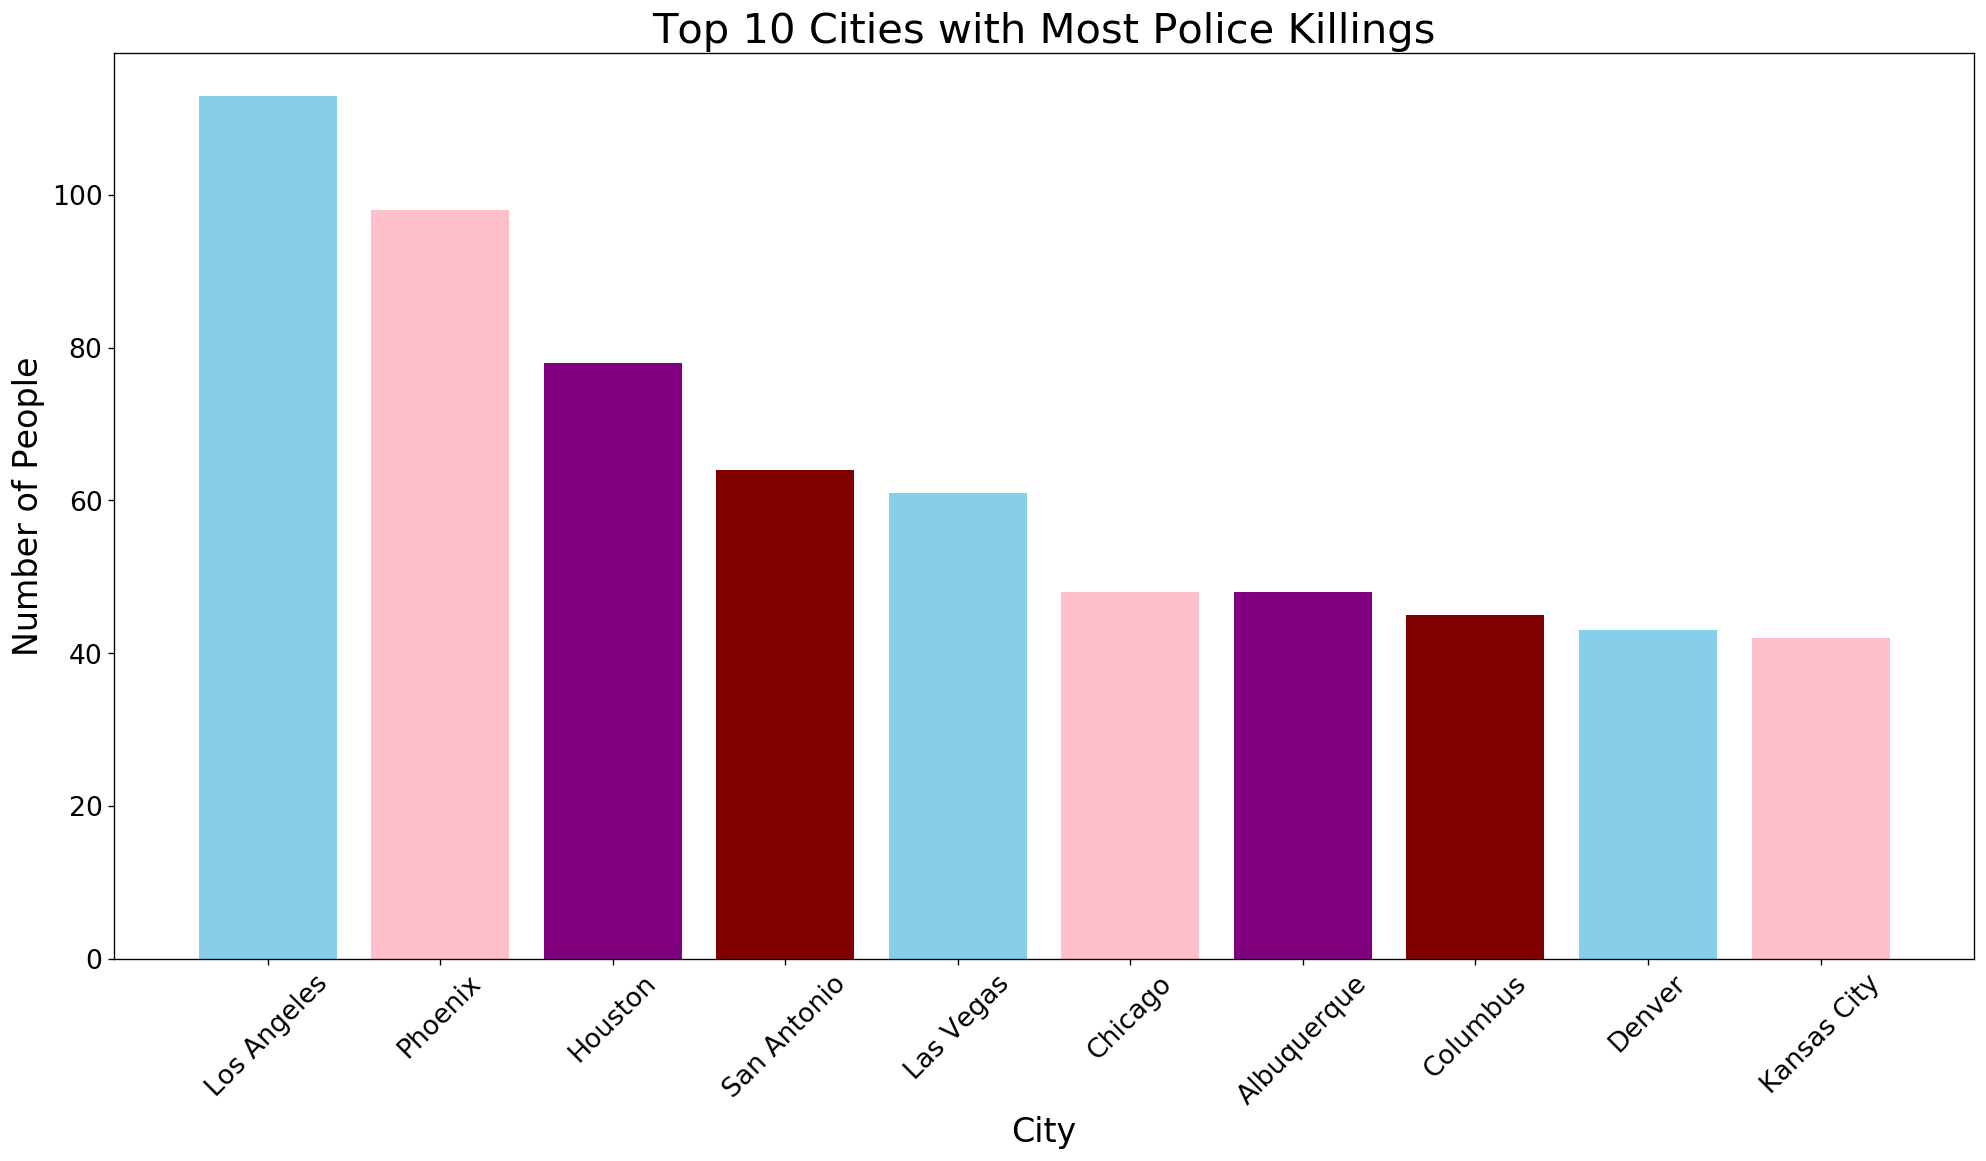

In [259]:
plt.figure(figsize=(20,10), dpi=120)
plt.xticks(fontsize=16, rotation=45) # Rotate category names to avoid overlap
plt.yticks(fontsize=16)
plt.ylabel('Number of People', fontsize=20)
plt.xlabel('City', fontsize=20)
plt.title('Top 10 Cities with Most Police Killings', fontsize=25)

plt.bar(top_10_cities.index, top_10_cities.id, color=['skyblue', 'pink', 'purple', 'maroon'])

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [26]:
grouped_by_state = df_fatalities.groupby('state').count()
grouped_by_state.sort_values('id', ascending=False).head()

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
state,,,,,,,,,,,,,,,,
CA,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
TX,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640
FL,461,461,461,461,461,461,461,461,461,461,461,461,461,461,461,461
AZ,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332
GA,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267


In [36]:
# fig = px.choropleth(grouped_by_state,
#                     locations=grouped_by_state.index, 
#                     locationmode="USA-states", 
#                     scope="usa",
#                     color=grouped_by_state.id,
#                     color_continuous_scale="Viridis_r")
# fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [283]:
# Convert dates with datetime 
df_fatalities.date = pd.to_datetime(df_fatalities.date)

In [308]:
df_fatalities['year'] = pd.DatetimeIndex(df_fatalities['date']).year

grouped_by_date = df_fatalities['year'].value_counts().sort_values('index',ascending=True)

# Deleted the year 2022 since there isn't enough data collected thus far
grouped_by_date = grouped_by_date.tail(grouped_by_date.shape[0] -1)
grouped_by_date

2016     958
2017     981
2018     985
2015     994
2019     999
2020    1020
2021    1054
Name: year, dtype: int64

<BarContainer object of 7 artists>

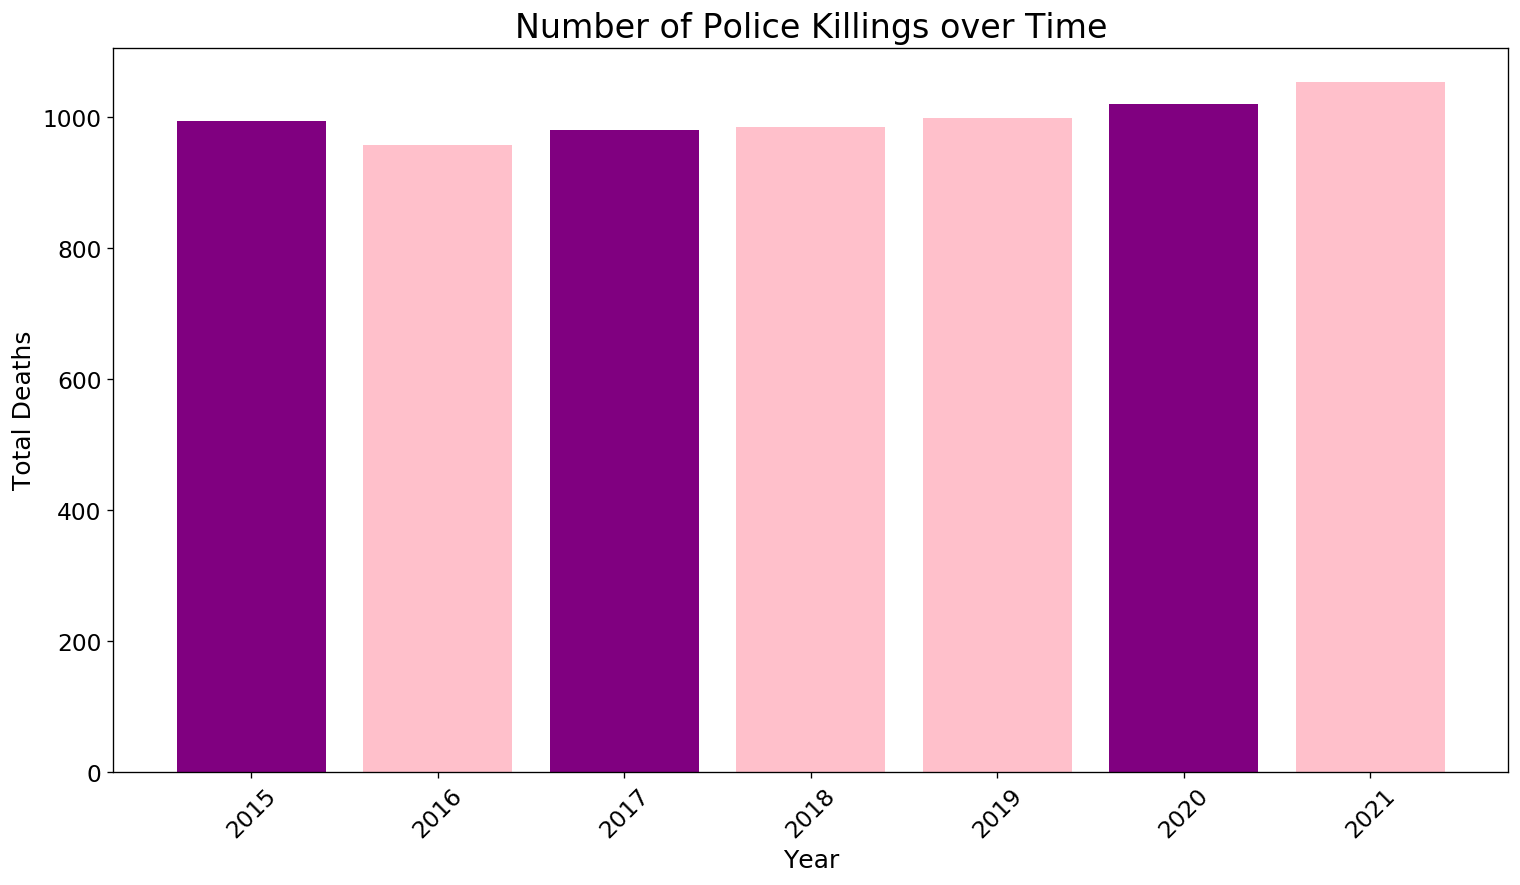

In [316]:
plt.figure(figsize=(15,8), dpi=120)
plt.xticks(fontsize=14, rotation=45) # Rotate category names to avoid overlap
plt.yticks(fontsize=14)
plt.ylabel('Total Deaths', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Number of Police Killings over Time', fontsize=20)

plt.bar(grouped_by_date.index, grouped_by_date, color=['pink', 'purple'])

In [ ]:
# Number of police killings over time appears to remain fairly consistent.